Code that computes the average accuracy of a group for a certain number of trials in basic Wisdom of Crowds

In [2]:
def group_prediction(agent_accuracy,agent_number,experiment_count=1):
    import random
    group_accuracy = []
    for i in range(experiment_count):
        predictions = [random.random() < agent_accuracy for _ in range(agent_number)]
        group_accuracy.append(float(sum(predictions)) / len(predictions))
    return sum(group_accuracy) / len(group_accuracy)

group_prediction(0.51 , 10 , 100)

0.522

Code for generating an inference of group accuracy vs. population for a fixed agent accuracy (individual_accuracy) in basic Wisdom of Crowds

*Observe the curve for different individual accuracies*

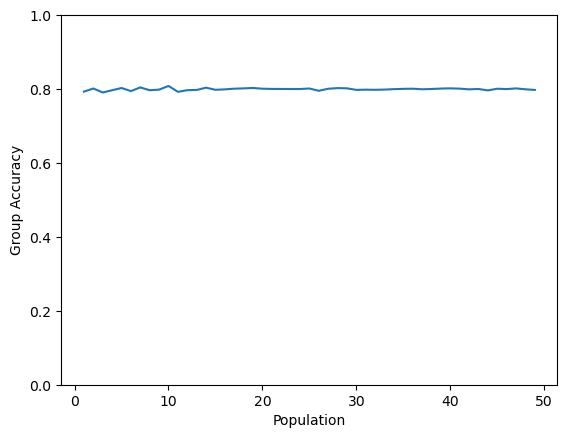

In [12]:
group_population = [i for i in range(1,50)]
individual_accuracy = 0.8
results = []
iters = 1000
for popy in group_population:
        results.append([popy,group_prediction(individual_accuracy,popy,iters)])

import matplotlib.pyplot as plt

x = [e[0] for e in results]
y = [e[1] for e in results]

plt.plot(x, y)
plt.xlabel('Population')
plt.ylabel('Group Accuracy')
plt.ylim(0,1)
plt.show()


Code for generating an inference of group accuracy vs. agent accuracy for a fixed group size in basic Wisdom of Crowds

*Observe the curve for different group sizes*

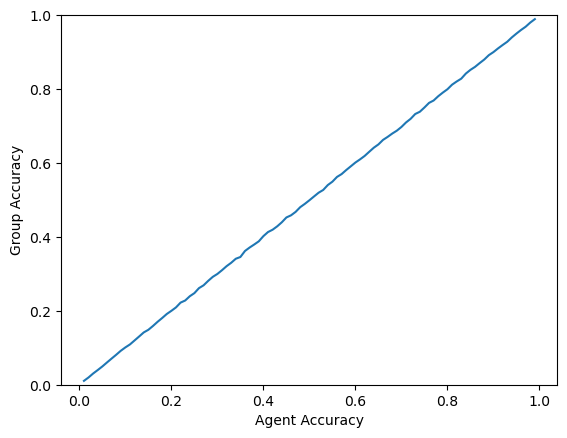

In [16]:
group_population = 64
individual_accuracy = [i/100 for i in range(1,100)]
results = []
iters = 1000
for acc in individual_accuracy:
        results.append([acc,group_prediction(acc,group_population,iters)])

import matplotlib.pyplot as plt

x = [e[0] for e in results]
y = [e[1] for e in results]

plt.plot(x, y)
plt.xlabel('Agent Accuracy')
plt.ylabel('Group Accuracy')
plt.ylim(0,1)
plt.show()

Code for generating an inference of "group accuracy vs. agent accuracy" and "group accuracy vs. population" in Condorcet's jury

*Observe the curve for different group sizes and individual accuracies*

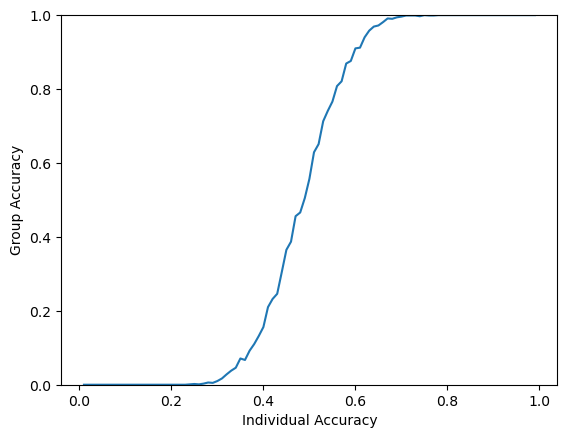

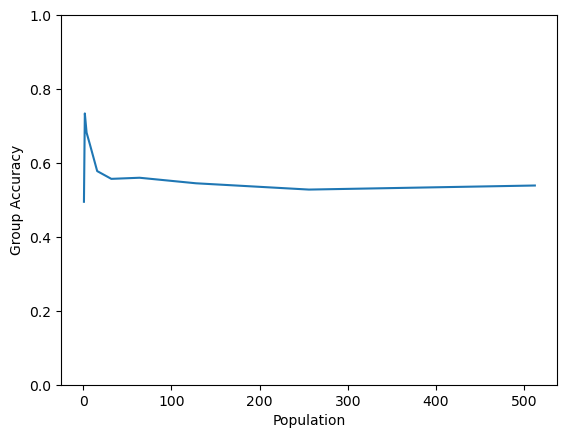

In [17]:
def jury_prediction(agent_accuracy,agent_number,experiment_count=1):
    import random
    group_decision = []
    for i in range(experiment_count):
        predictions = [random.random() < agent_accuracy for _ in range(agent_number)]
        group_decision.append(sum(predictions) >= len(predictions)/2)
    return sum(group_decision) / len(group_decision)


group_population = [2**i for i in range(10)] #changes in power of 2s / can be changed
individual_accuracy = [i/100 for i in range(1,100)] # from 0.01 to 0.99
results = []
iters = 1000
for popy in group_population:
    for acc in individual_accuracy:
        results.append([acc,popy,jury_prediction(acc,popy,iters)])

import matplotlib.pyplot as plt


current_pop = 32 # select one that exists in list group population
x = [e[0] for e in results if e[1] == current_pop ]
y = [e[2] for e in results if e[1] == current_pop ]
plt.plot(x, y)
plt.xlabel('Individual Accuracy')
plt.ylabel('Group Accuracy')
plt.ylim(0,1)
plt.show()

current_prob = 0.5  # select one that exists in list individual_accuracy
x = [e[1] for e in results if e[0] == current_prob ]
y = [e[2] for e in results if e[0] == current_prob ]
plt.plot(x, y)
plt.xlabel('Population')
plt.ylabel('Group Accuracy')
plt.ylim(0,1)
plt.show()

A single line of code to run an averaging simulation on f(agent_accuracy,group_size,simulation_count) in Condorcet's jury

In [18]:
jury_prediction(0.8,11,10000)

0.9882